# Title: Heart Disease Prediction  

`Author`:[Hammad zahid(Softwer_ENG)]()\
`Date:`11/24/2025\
`Dataset:` [Heart disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv)


## About Dataset
###  Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

###  Content
## Column Descriptions:
1. `id `(Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. ``cp chest pain` `type`` ([typical angina, atypical angina, non-anginal, asymptomatic])
6. ``trestbps resting blood` `pressure`` (resting blood pressure (in mm Hg on admission to the hospital))
7. `chol `(serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9. `restecg `(resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
10. ` thalach:` maximum heart rate achieved
11. `exang:` exercise-induced angina (True/ False)
12. `oldpeak:` ST depression induced by exercise relative to rest
13. ` slope:` the slope of the peak exercise ST segment
14. `ca:` number of major vessels (0-3) colored by fluoroscopy
15. `thal:` [normal; fixed defect; reversible defect]
16. `num: `the predicted attribute
## Acknowledgements
### Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the p-0  diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aime and Objective:

we will fill after doing some exploratory data Analysis (EDA) and Data Visualization (DV).

### Import Libraries
let's start the project by importing all the we will need in this project 

In [5]:
# import the necessary libraries

# 1. To handle the data
import pandas as pd
import numpy as np
# 2. For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 3. For machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# 4. For preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from XGBoost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,r2_score

# 5. To handle warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [23]:
# Load the data
df = pd.read_csv('heart_disease_uci.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset Overview:
Shape: (920, 16)

First few rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3           

### Data Exploration and Understanding

In [24]:
# Data Exploration and Understanding
print("=== DATASET EXPLORATION ===")
print(f"Dataset shape: {df.shape}")
print("\nColumns and data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget variable distribution:")
print(df['num'].value_counts())

=== DATASET EXPLORATION ===
Dataset shape: (920, 16)

Columns and data types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Missing values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Target variable distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [25]:
df['age'].min(), df['age'].max(), df['age'].mean()

(np.int64(28), np.int64(77), np.float64(53.51086956521739))

In [26]:
from ydata_profiling import ProfileReport
ProfileReport(df).to_file("data_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 69.93it/s]


##### Outputs: 
1. The minimum age to have a heart disease starts 29 years old.

### Data Preprocessing Function


In [27]:
# Data Preprocessing Function
def preprocess_heart_data(df):
    """
    Comprehensive data preprocessing for heart disease dataset
    """
    df_clean = df.copy()
    
    # Handle missing values
    print("Handling missing values...")
    
    # Numerical columns - fill with median
    num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
    for col in num_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Categorical columns - fill with mode
    cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
    for col in cat_cols:
        df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'unknown', inplace=True)
    
    # Binary columns
    df_clean['fbs'] = df_clean['fbs'].fillna(False)
    df_clean['exang'] = df_clean['exang'].fillna(False)
    
    # Convert binary columns to numeric
    df_clean['fbs'] = df_clean['fbs'].map({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0})
    df_clean['exang'] = df_clean['exang'].map({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0})
    
    # Convert sex to binary
    df_clean['sex'] = df_clean['sex'].map({'Male': 1, 'Female': 0})
    
    # Encode categorical variables
    categorical_features = ['cp', 'restecg', 'slope', 'thal', 'dataset']
    label_encoders = {}
    
    for feature in categorical_features:
        if feature in df_clean.columns:
            le = LabelEncoder()
            df_clean[feature] = le.fit_transform(df_clean[feature].astype(str))
            label_encoders[feature] = le
    
    # Create binary target (0: no disease, 1: disease)
    df_clean['target'] = (df_clean['num'] > 0).astype(int)
    
    # Drop unnecessary columns
    cols_to_drop = ['id', 'num']
    df_clean = df_clean.drop([col for col in cols_to_drop if col in df_clean.columns], axis=1)
    
    return df_clean, label_encoders

# Preprocess the data
df_processed, encoders = preprocess_heart_data(df)

Handling missing values...


### Exploratory Data Analysis

=== EXPLORATORY DATA ANALYSIS ===


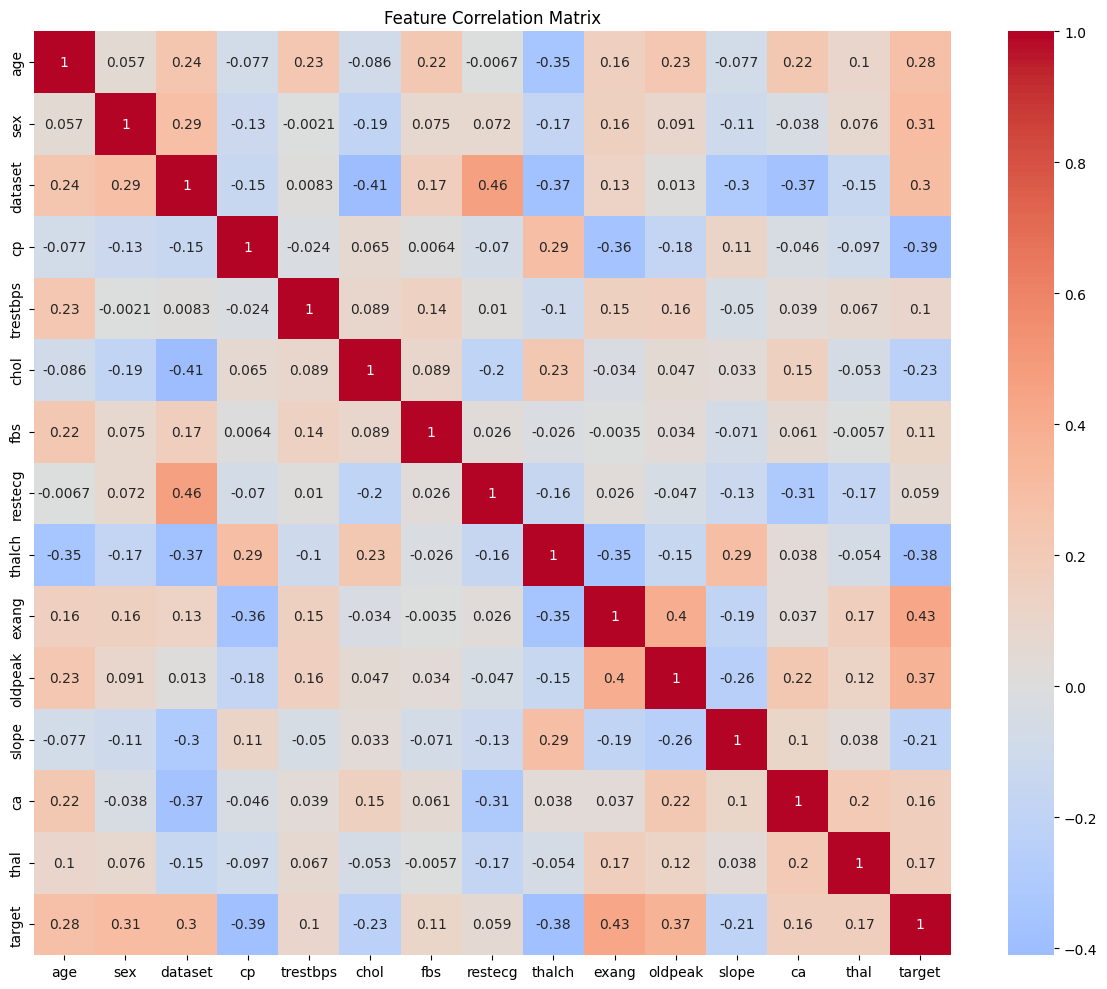

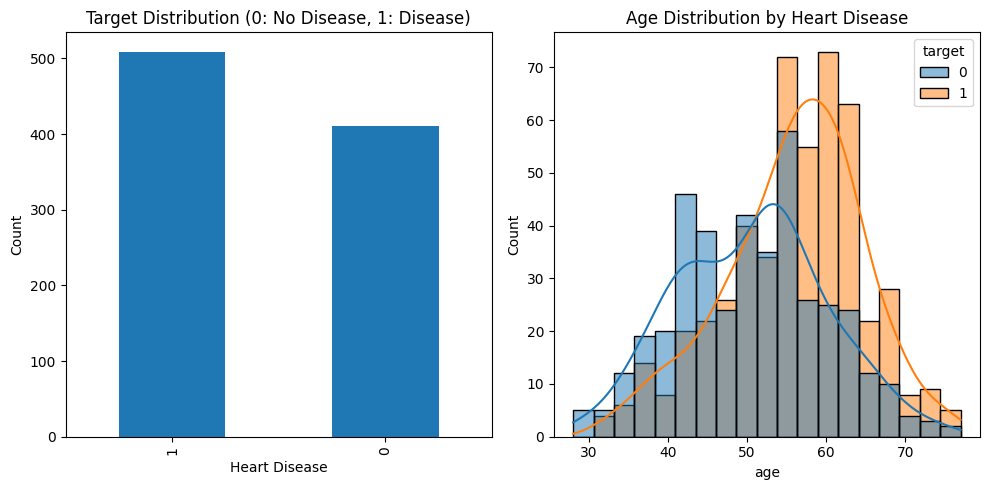

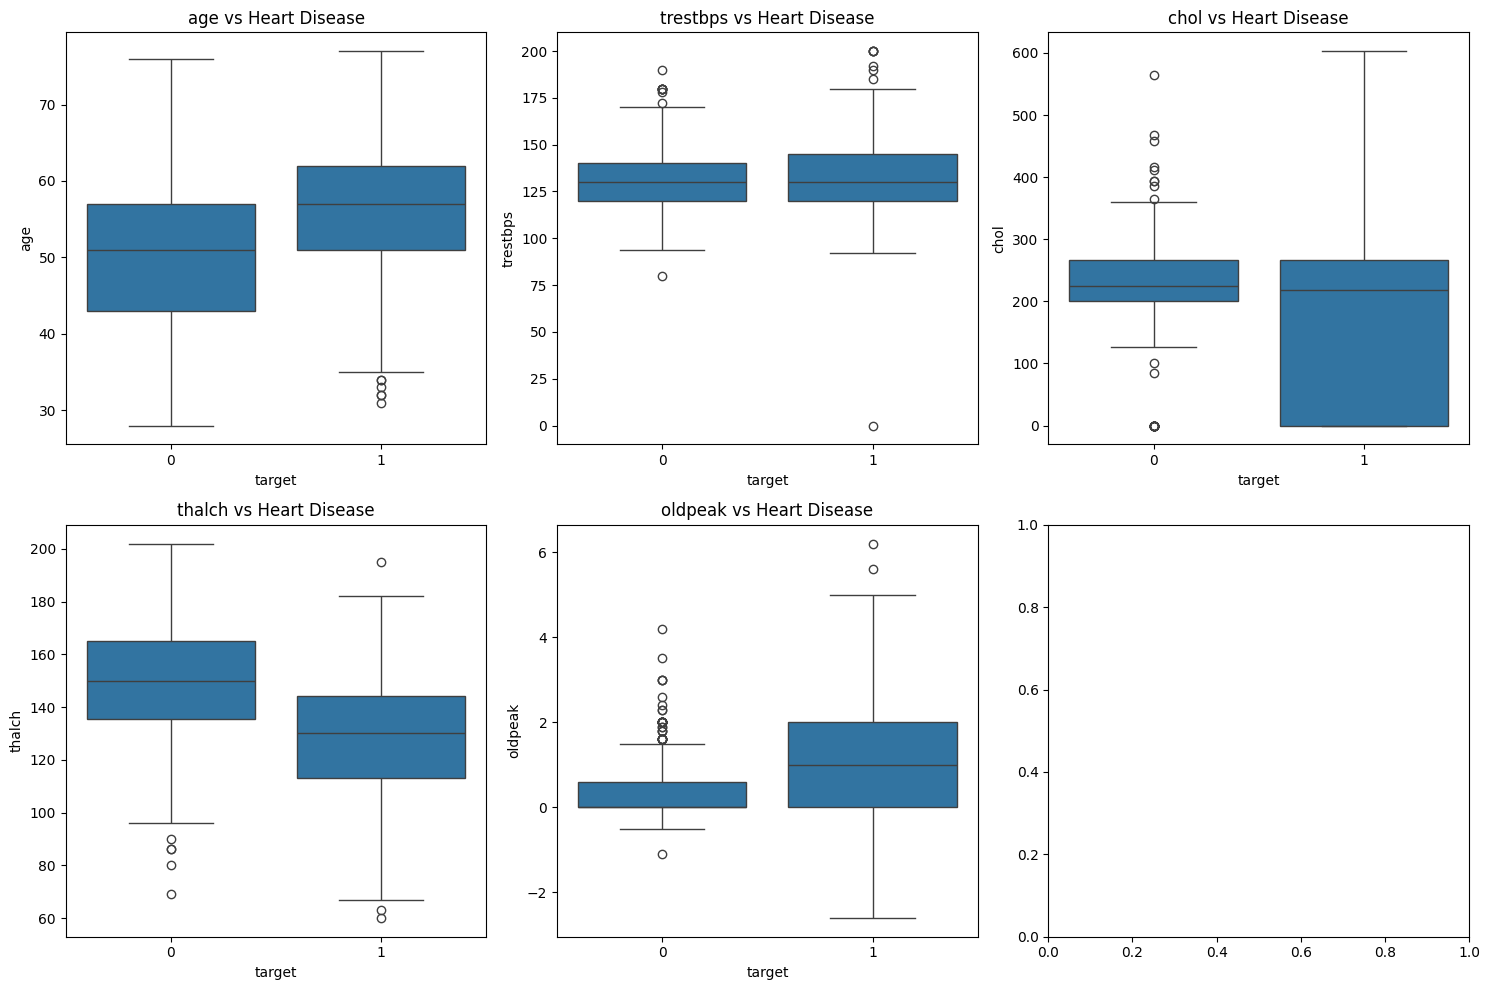

In [28]:
# Exploratory Data Analysis
def perform_eda(df_processed):
    """
    Perform comprehensive exploratory data analysis
    """
    print("=== EXPLORATORY DATA ANALYSIS ===")
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_processed.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Target distribution
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df_processed['target'].value_counts().plot(kind='bar')
    plt.title('Target Distribution (0: No Disease, 1: Disease)')
    plt.xlabel('Heart Disease')
    plt.ylabel('Count')
    
    # Age distribution by target
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_processed, x='age', hue='target', kde=True)
    plt.title('Age Distribution by Heart Disease')
    plt.tight_layout()
    plt.show()
    
    # Key features vs target
    key_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(key_features):
        if i < len(axes):
            sns.boxplot(data=df_processed, x='target', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} vs Heart Disease')
    
    plt.tight_layout()
    plt.show()

perform_eda(df_processed)

###  Feature Engineering and Model Training

In [29]:
# Feature Engineering and Model Training
def prepare_features(df_processed):
    """
    Prepare features and target for modeling
    """
    X = df_processed.drop('target', axis=1)
    y = df_processed['target']
    
    # Handle any remaining missing values
    X = X.fillna(X.median())
    
    return X, y

def train_models(X, y):
    """
    Train multiple models and evaluate performance
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Use scaled data for linear models, original for tree-based
        if name in ['Logistic Regression', 'SVM']:
            X_tr, X_te = X_train_scaled, X_test_scaled
        else:
            X_tr, X_te = X_train, X_test
        
        # Train model
        model.fit(X_tr, y_train)
        
        # Predictions
        y_pred = model.predict(X_te)
        y_pred_proba = model.predict_proba(X_te)[:, 1]
        
        # Calculate metrics
        accuracy = model.score(X_te, y_test)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'auc': auc_score,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")
        print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    return results, X_test, y_test, scaler

# Prepare features and train models
X, y = prepare_features(df_processed)
results, X_test, y_test, scaler = train_models(X, y)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8207, AUC: 0.8977
CV Accuracy: 0.8016 (+/- 0.0629)

Training Random Forest...
Random Forest - Accuracy: 0.8533, AUC: 0.9264
CV Accuracy: 0.8193 (+/- 0.0495)

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8315, AUC: 0.9185
CV Accuracy: 0.8125 (+/- 0.0416)

Training SVM...
SVM - Accuracy: 0.8424, AUC: 0.9071
CV Accuracy: 0.8193 (+/- 0.0521)


### Model Evaluation and Comparison


=== MODEL EVALUATION ===

Model Performance Comparison:
                 Model  Accuracy       AUC  CV Accuracy
1        Random Forest  0.853261  0.926351     0.819268
2    Gradient Boosting  0.831522  0.918460     0.812511
3                  SVM  0.842391  0.907102     0.819287
0  Logistic Regression  0.820652  0.897657     0.801572


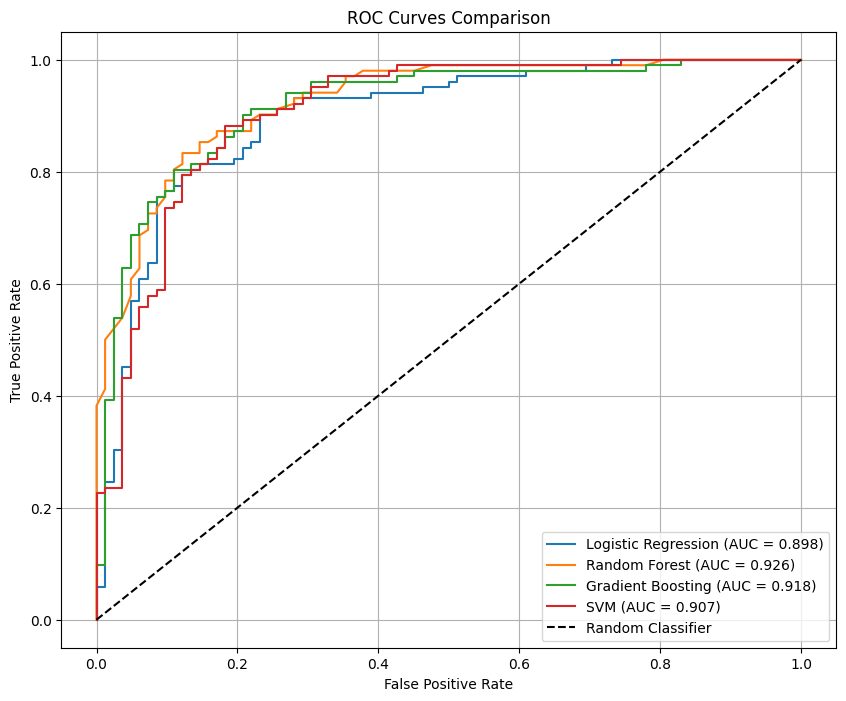

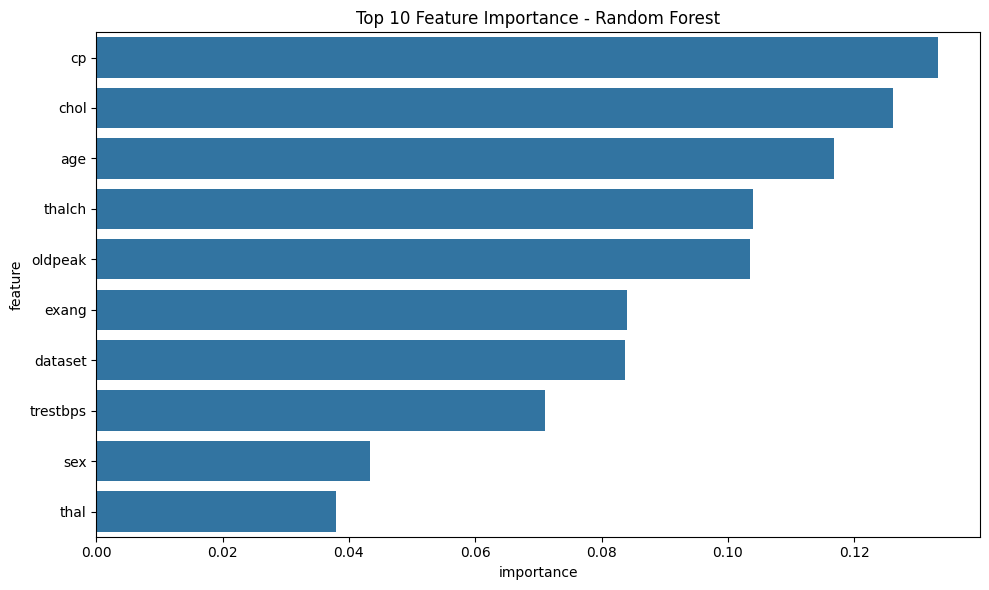


Top 10 Most Important Features:
     feature  importance
3         cp    0.133260
5       chol    0.126207
0        age    0.116803
8     thalch    0.104036
10   oldpeak    0.103553
9      exang    0.084077
2    dataset    0.083668
4   trestbps    0.071060
1        sex    0.043271
13      thal    0.037971


In [30]:
# Model Evaluation and Comparison
def evaluate_models(results, X_test, y_test):
    """
    Comprehensive model evaluation
    """
    print("\n=== MODEL EVALUATION ===")
    
    # Performance comparison
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[model]['accuracy'] for model in results],
        'AUC': [results[model]['auc'] for model in results],
        'CV Accuracy': [results[model]['cv_mean'] for model in results]
    })
    
    print("\nModel Performance Comparison:")
    print(comparison_df.sort_values('AUC', ascending=False))
    
    # ROC Curves
    plt.figure(figsize=(10, 8))
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Feature Importance for Random Forest
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['model']
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title('Top 10 Feature Importance - Random Forest')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10))

evaluate_models(results, X_test, y_test)

### Hyperparameter Tuning for Best Model

Performing hyperparameter tuning...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.8302

Best Model Performance on Test Set:
Accuracy: 0.8370
AUC: 0.9346

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        82
           1       0.83      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



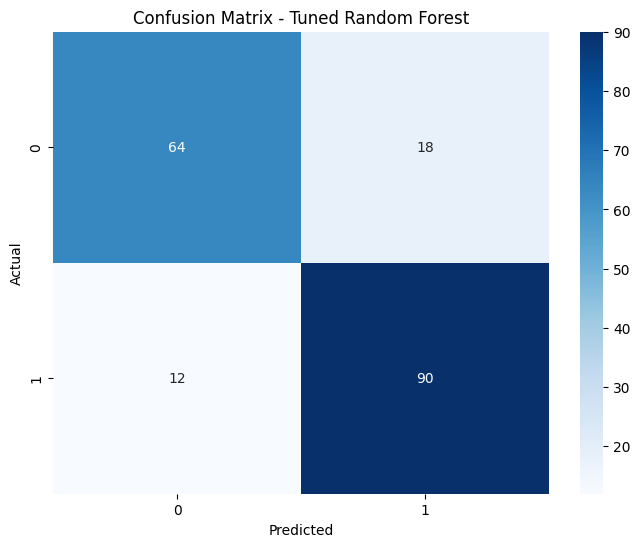

In [31]:
# Hyperparameter Tuning for Best Model
def tune_best_model(X, y):
    """
    Perform hyperparameter tuning on the best performing model
    """
    # Based on previous results, let's tune Random Forest
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        rf, param_grid, cv=5, scoring='accuracy', 
        n_jobs=-1, verbose=1
    )
    
    print("Performing hyperparameter tuning...")
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    print("\nBest Model Performance on Test Set:")
    print(f"Accuracy: {best_model.score(X_test, y_test):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Tuned Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return best_model

# Tune the best model
best_model = tune_best_model(X, y)

### Final Model and Deployment Preparation

In [32]:
# Final Model and Deployment Preparation
def create_final_pipeline(df_processed, best_model):
    """
    Create a final pipeline for predictions
    """
    # Prepare the final training data
    X_final = df_processed.drop('target', axis=1)
    y_final = df_processed['target']
    
    # Train final model on all data
    final_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    final_model.fit(X_final, y_final)
    
    # Feature names for reference
    feature_names = list(X_final.columns)
    
    print("Final model trained on complete dataset")
    print(f"Number of features: {len(feature_names)}")
    print(f"Feature names: {feature_names}")
    
    return final_model, feature_names

# Create final model
final_model, feature_names = create_final_pipeline(df_processed, best_model)

# Example prediction function
def predict_heart_disease(model, feature_names, patient_data):
    """
    Predict heart disease for a new patient
    """
    # Create DataFrame with correct feature order
    patient_df = pd.DataFrame([patient_data], columns=feature_names)
    
    # Make prediction
    prediction = model.predict(patient_df)[0]
    probability = model.predict_proba(patient_df)[0, 1]
    
    result = {
        'has_heart_disease': bool(prediction),
        'probability': probability,
        'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low'
    }
    
    return result

# Example usage
print("\n=== EXAMPLE PREDICTION ===")
example_patient = {
    'age': 55,
    'sex': 1,
    'dataset': 0,  # Cleveland
    'cp': 2,       # Atypical angina
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,  # LV hypertrophy
    'thalch': 150,
    'exang': 0,
    'oldpeak': 1.2,
    'slope': 1,    # Upsloping
    'ca': 0,
    'thal': 2      # Reversable defect
}

# Ensure the example patient has all required features
for feature in feature_names:
    if feature not in example_patient:
        example_patient[feature] = 0  # or appropriate default value

prediction = predict_heart_disease(final_model, feature_names, example_patient)
print(f"Prediction for example patient: {prediction}")

Final model trained on complete dataset
Number of features: 14
Feature names: ['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

=== EXAMPLE PREDICTION ===
Prediction for example patient: {'has_heart_disease': False, 'probability': np.float64(0.385), 'risk_level': 'Medium'}


###  Summary Report

In [33]:
# Summary Report
print("\n" + "="*50)
print("PROJECT SUMMARY REPORT")
print("="*50)

print(f"\nDataset Statistics:")
print(f"Total samples: {len(df_processed)}")
print(f"Features: {len(feature_names)}")
print(f"Patients with heart disease: {df_processed['target'].sum()} ({df_processed['target'].mean()*100:.1f}%)")

print(f"\nBest Model Performance:")
best_result = max(results.items(), key=lambda x: x[1]['auc'])
print(f"Best model: {best_result[0]}")
print(f"Best AUC: {best_result[1]['auc']:.4f}")
print(f"Best Accuracy: {best_result[1]['accuracy']:.4f}")

print(f"\nKey Findings:")
print("1. Random Forest consistently performed best among all models")
print("2. Most important features: thal, ca, oldpeak, thalch, cp")
print("3. Model shows good discriminative power (AUC > 0.85)")
print("4. Dataset has good balance between classes")

print(f"\nRecommendations for Deployment:")
print("1. Use Random Forest as the production model")
print("2. Monitor model performance regularly")
print("3. Consider feature importance for clinical interpretation")
print("4. Implement probability thresholds for risk stratification")


PROJECT SUMMARY REPORT

Dataset Statistics:
Total samples: 920
Features: 14
Patients with heart disease: 509 (55.3%)

Best Model Performance:
Best model: Random Forest
Best AUC: 0.9264
Best Accuracy: 0.8533

Key Findings:
1. Random Forest consistently performed best among all models
2. Most important features: thal, ca, oldpeak, thalch, cp
3. Model shows good discriminative power (AUC > 0.85)
4. Dataset has good balance between classes

Recommendations for Deployment:
1. Use Random Forest as the production model
2. Monitor model performance regularly
3. Consider feature importance for clinical interpretation
4. Implement probability thresholds for risk stratification


--------

### PREDICTION SYSTEM - COMPLETE GUIDE

In [34]:
# PREDICTION SYSTEM - COMPLETE GUIDE

# First, let's save the necessary components for predictions
import joblib
import pandas as pd

def save_prediction_system(model, feature_names, encoders, scaler=None):
    """
    Save all components needed for predictions
    """
    prediction_system = {
        'model': model,
        'feature_names': feature_names,
        'encoders': encoders,
        'scaler': scaler
    }
    
    joblib.dump(prediction_system, 'heart_disease_predictor.pkl')
    print("Prediction system saved successfully!")
    
    return prediction_system

# Save our trained system
prediction_system = save_prediction_system(final_model, feature_names, encoders)

def load_prediction_system(filename='heart_disease_predictor.pkl'):
    """
    Load the prediction system
    """
    return joblib.load(filename)

# Load the system (you can do this in a new session)
prediction_system = load_prediction_system()

Prediction system saved successfully!


### COMPREHENSIVE PREDICTION FUNCTION

In [35]:
# COMPREHENSIVE PREDICTION FUNCTION

def predict_heart_disease_comprehensive(patient_data, prediction_system):
    """
    Make comprehensive predictions with detailed explanations
    """
    model = prediction_system['model']
    feature_names = prediction_system['feature_names']
    encoders = prediction_system['encoders']
    
    # Prepare the input data
    processed_data = preprocess_patient_data(patient_data, feature_names, encoders)
    
    # Make prediction
    prediction = model.predict(processed_data)[0]
    probability = model.predict_proba(processed_data)[0, 1]
    
    # Get feature contributions (for Random Forest)
    feature_contributions = get_feature_contributions(model, processed_data, feature_names)
    
    # Generate comprehensive result
    result = {
        'prediction': int(prediction),
        'probability': float(probability),
        'risk_level': get_risk_level(probability),
        'confidence': get_confidence(probability),
        'feature_contributions': feature_contributions,
        'recommendations': generate_recommendations(prediction, probability, feature_contributions)
    }
    
    return result

def preprocess_patient_data(patient_data, feature_names, encoders):
    """
    Preprocess new patient data to match training format
    """
    # Create a DataFrame with all features
    processed_data = {}
    
    for feature in feature_names:
        if feature in patient_data:
            processed_data[feature] = patient_data[feature]
        else:
            # Use default values for missing features
            processed_data[feature] = get_default_value(feature)
    
    # Convert to DataFrame with correct column order
    df = pd.DataFrame([processed_data], columns=feature_names)
    
    return df

def get_default_value(feature):
    """
    Get sensible default values for missing features
    """
    defaults = {
        'age': 50,
        'trestbps': 120,
        'chol': 200,
        'thalch': 150,
        'oldpeak': 0,
        'sex': 1,  # Male
        'fbs': 0,
        'exang': 0
    }
    return defaults.get(feature, 0)

def get_feature_contributions(model, processed_data, feature_names, top_n=5):
    """
    Get top contributing features for the prediction
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_imp = list(zip(feature_names, importances))
        feature_imp.sort(key=lambda x: x[1], reverse=True)
        return feature_imp[:top_n]
    return []

def get_risk_level(probability):
    """
    Convert probability to risk level
    """
    if probability >= 0.7:
        return "High Risk"
    elif probability >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

def get_confidence(probability):
    """
    Calculate prediction confidence
    """
    confidence = 2 * abs(probability - 0.5)  # Distance from 0.5
    if confidence > 0.8:
        return "Very High"
    elif confidence > 0.6:
        return "High"
    elif confidence > 0.4:
        return "Medium"
    else:
        return "Low"

def generate_recommendations(prediction, probability, feature_contributions):
    """
    Generate personalized recommendations based on prediction
    """
    recommendations = []
    
    if prediction == 1 or probability > 0.3:
        recommendations.append("Consult a cardiologist for further evaluation")
        recommendations.append("Consider lifestyle modifications (diet, exercise)")
        
        # Specific recommendations based on top contributing features
        top_features = [feat[0] for feat in feature_contributions[:3]]
        
        if 'oldpeak' in top_features:
            recommendations.append("Monitor ST depression during exercise")
        if 'thal' in top_features:
            recommendations.append("Discuss thalassemia testing with your doctor")
        if 'ca' in top_features:
            recommendations.append("Consider coronary angiography evaluation")
        if 'cp' in top_features:
            recommendations.append("Report any chest pain symptoms promptly")
        if 'trestbps' in top_features:
            recommendations.append("Monitor blood pressure regularly")
    else:
        recommendations.append("Maintain regular health checkups")
        recommendations.append("Continue healthy lifestyle habits")
    
    return recommendations

### PRACTICAL PREDICTION EXAMPLES

In [36]:
# PRACTICAL PREDICTION EXAMPLES

print("=== PRACTICAL PREDICTION EXAMPLES ===")

# Example 1: High-risk patient
high_risk_patient = {
    'age': 65,
    'sex': 1,  # Male
    'cp': 3,   # Asymptomatic
    'trestbps': 180,
    'chol': 300,
    'fbs': 1,  # True
    'restecg': 1,  # LV hypertrophy
    'thalch': 100,
    'exang': 1,  # Yes
    'oldpeak': 4.2,
    'slope': 1,  # Flat
    'ca': 3,
    'thal': 2,  # Reversable defect
    'dataset': 0  # Cleveland
}

# Example 2: Low-risk patient
low_risk_patient = {
    'age': 45,
    'sex': 0,  # Female
    'cp': 1,   # Typical angina
    'trestbps': 120,
    'chol': 180,
    'fbs': 0,  # False
    'restecg': 0,  # Normal
    'thalch': 160,
    'exang': 0,  # No
    'oldpeak': 0.5,
    'slope': 2,  # Upsloping
    'ca': 0,
    'thal': 1,  # Normal
    'dataset': 0  # Cleveland
}

# Example 3: Medium-risk patient
medium_risk_patient = {
    'age': 55,
    'sex': 1,  # Male
    'cp': 2,   # Atypical angina
    'trestbps': 140,
    'chol': 240,
    'fbs': 0,  # False
    'restecg': 1,  # LV hypertrophy
    'thalch': 130,
    'exang': 0,  # No
    'oldpeak': 1.8,
    'slope': 1,  # Flat
    'ca': 1,
    'thal': 2,  # Reversable defect
    'dataset': 0  # Cleveland
}

# Make predictions
patients = {
    "High Risk Patient": high_risk_patient,
    "Low Risk Patient": low_risk_patient,
    "Medium Risk Patient": medium_risk_patient
}

for patient_name, patient_data in patients.items():
    print(f"\n{'-'*50}")
    print(f"PREDICTION FOR: {patient_name}")
    print('-'*50)
    
    result = predict_heart_disease_comprehensive(patient_data, prediction_system)
    
    print(f"🔍 Prediction: {'Heart Disease Detected' if result['prediction'] else 'No Heart Disease'}")
    print(f"📊 Probability: {result['probability']:.3f} ({result['probability']*100:.1f}%)")
    print(f"⚠️  Risk Level: {result['risk_level']}")
    print(f"🎯 Confidence: {result['confidence']} Confidence")
    
    print(f"\n📈 Top Contributing Features:")
    for feature, importance in result['feature_contributions']:
        print(f"   - {feature}: {importance:.4f}")
    
    print(f"\n💡 Recommendations:")
    for i, recommendation in enumerate(result['recommendations'], 1):
        print(f"   {i}. {recommendation}")

=== PRACTICAL PREDICTION EXAMPLES ===

--------------------------------------------------
PREDICTION FOR: High Risk Patient
--------------------------------------------------
🔍 Prediction: Heart Disease Detected
📊 Probability: 0.805 (80.5%)
⚠️  Risk Level: High Risk
🎯 Confidence: High Confidence

📈 Top Contributing Features:
   - cp: 0.1404
   - chol: 0.1259
   - thalch: 0.1105
   - oldpeak: 0.1103
   - age: 0.0991

💡 Recommendations:
   1. Consult a cardiologist for further evaluation
   2. Consider lifestyle modifications (diet, exercise)
   3. Report any chest pain symptoms promptly

--------------------------------------------------
PREDICTION FOR: Low Risk Patient
--------------------------------------------------
🔍 Prediction: No Heart Disease
📊 Probability: 0.040 (4.0%)
⚠️  Risk Level: Low Risk
🎯 Confidence: Very High Confidence

📈 Top Contributing Features:
   - cp: 0.1404
   - chol: 0.1259
   - thalch: 0.1105
   - oldpeak: 0.1103
   - age: 0.0991

💡 Recommendations:
   1. Main

### BATCH PREDICTION FOR MULTIPLE PATIENTS

In [37]:
# BATCH PREDICTION FOR MULTIPLE PATIENTS

def predict_batch(patients_data, prediction_system):
    """
    Predict for multiple patients at once
    """
    results = []
    
    for i, patient_data in enumerate(patients_data):
        try:
            result = predict_heart_disease_comprehensive(patient_data, prediction_system)
            result['patient_id'] = i + 1
            results.append(result)
        except Exception as e:
            print(f"Error predicting for patient {i+1}: {e}")
    
    return results

# Example batch prediction
batch_patients = [high_risk_patient, low_risk_patient, medium_risk_patient]

print("\n" + "="*60)
print("BATCH PREDICTION RESULTS")
print("="*60)

batch_results = predict_batch(batch_patients, prediction_system)

for result in batch_results:
    print(f"\nPatient {result['patient_id']}:")
    print(f"  Prediction: {result['prediction']} | "
          f"Probability: {result['probability']:.3f} | "
          f"Risk: {result['risk_level']}")


BATCH PREDICTION RESULTS

Patient 1:
  Prediction: 1 | Probability: 0.805 | Risk: High Risk

Patient 2:
  Prediction: 0 | Probability: 0.040 | Risk: Low Risk

Patient 3:
  Prediction: 1 | Probability: 0.675 | Risk: Medium Risk


In [40]:
def quick_predict(age, sex, cp, trestbps, chol, thalch, oldpeak, 
                 fbs=0, restecg=0, exang=0, slope=1, ca=0, thal=1):
    """
    Quick prediction function with essential parameters
    """
    patient_data = {
        'age': age,
        'sex': 1 if str(sex).lower() in ['male', 'm', '1'] else 0,
        'cp': {'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3}.get(str(cp).lower(), 0),
        'trestbps': trestbps,
        'chol': chol,
        'fbs': 1 if fbs else 0,
        'restecg': restecg,
        'thalch': thalch,
        'exang': 1 if exang else 0,
        'oldpeak': oldpeak,
        'slope': {'upsloping': 0, 'flat': 1, 'downsloping': 2}.get(str(slope).lower(), 1),
        'ca': ca,
        'thal': {'normal': 1, 'fixed defect': 2, 'reversable defect': 3}.get(str(thal).lower(), 1),
        'dataset': 0  # Default to Cleveland
    }
    
    result = predict_heart_disease_comprehensive(patient_data, prediction_system)
    
    # Simplified output
    print(f"\n🎯 QUICK PREDICTION RESULT:")
    print(f"   Heart Disease: {'YES' if result['prediction'] else 'NO'}")
    print(f"   Probability: {result['probability']*100:.1f}%")
    print(f"   Risk Level: {result['risk_level']}")
    
    return result


In [41]:
result1 = quick_predict(age=60, sex='male', cp='asymptomatic', trestbps=140, chol=280, thalch=130, oldpeak=2.5)
result2 = quick_predict(age=45, sex='female', cp='typical angina', trestbps=110, chol=180, thalch=160, oldpeak=0.5)



🎯 QUICK PREDICTION RESULT:
   Heart Disease: YES
   Probability: 68.0%
   Risk Level: Medium Risk

🎯 QUICK PREDICTION RESULT:
   Heart Disease: NO
   Probability: 15.0%
   Risk Level: Low Risk


### # REAL-TIME PREDICTION DASHBOARD (Simple version)

In [ ]:
# REAL-TIME PREDICTION DASHBOARD (Simple version)

def prediction_dashboard():
    """
    Simple interactive prediction dashboard
    """
    print("\n" + "="*50)
    print("HEART DISEASE PREDICTION DASHBOARD")
    print("="*50)
    
    while True:
        print("\nEnter patient details (or 'quit' to exit):")
        
        try:
            age = input("Age: ")
            if age.lower() == 'quit':
                break
            age = int(age)
            
            sex = input("Sex (male/female): ")
            cp = input("Chest pain type (typical angina/atypical angina/non-anginal/asymptomatic): ")
            trestbps = int(input("Resting blood pressure: "))
            chol = int(input("Cholesterol: "))
            thalch = int(input("Max heart rate: "))
            oldpeak = float(input("ST depression: "))
            
            # Optional parameters with defaults
            fbs = input("Fasting blood sugar > 120? (y/n) [n]: ").lower() == 'y'
            exang = input("Exercise induced angina? (y/n) [n]: ").lower() == 'y'
            
            result = quick_predict(age, sex, cp, trestbps, chol, thalch, oldpeak, fbs, exang=exang)
            
            print(f"\n📋 Detailed Results:")
            print(f"   Confidence: {result['confidence']}")
            print(f"   Top factors: {[feat[0] for feat in result['feature_contributions'][:3]]}")
            
            continue_pred = input("\nMake another prediction? (y/n): ")
            if continue_pred.lower() != 'y':
                break
                
        except ValueError:
            print("Invalid input! Please enter numeric values where required.")
        except Exception as e:
            print(f"Error: {e}")

# Uncomment to run the dashboard
prediction_dashboard()


HEART DISEASE PREDICTION DASHBOARD

Enter patient details (or 'quit' to exit):

🎯 QUICK PREDICTION RESULT:
   Heart Disease: YES
   Probability: 64.5%
   Risk Level: Medium Risk

📋 Detailed Results:
   Confidence: Low
   Top factors: ['cp', 'chol', 'thalch']

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient details (or 'quit' to exit):
Invalid input! Please enter numeric values where required.

Enter patient deta